In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import uuid

# === INITIALIZE BROWSER ===
# Kh·ªüi t·∫°o tr√¨nh duy·ªát
def initialize_browser():
    options = Options()
    options.add_argument('--headless')  # Run in headless mode
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--no-sandbox')
    browser = webdriver.Chrome(options=options)
    return browser

# === EXTRACT DATA FROM PAGE ===
# Tr√≠ch xu·∫•t d·ªØ li·ªáu t·ª´ trang web
def extract_page_data(browser, page_url):
    try:
        # Load the page and wait for table to load
        # T·∫£i trang v√† ch·ªù b·∫£ng d·ªØ li·ªáu xu·∫•t hi·ªán
        browser.get(page_url)
        WebDriverWait(browser, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'table.table-striped.leaguetable'))
        )
        html_content = browser.page_source
        soup = BeautifulSoup(html_content, 'lxml')
        
        # Find the target table containing player data
        # T√¨m b·∫£ng ch·ª©a th√¥ng tin c·∫ßu th·ªß
        target_table = soup.select_one('table.table.table-striped.leaguetable.mvp-table.similar-players-table')
        if not target_table:
            print(f"No table found on {page_url}")
            return []
        
        extracted_data = []
        table_rows = target_table.select('tbody tr')
        
        # Process each row in the table
        # X·ª≠ l√Ω t·ª´ng h√†ng trong b·∫£ng
        for row in table_rows:
            try:
                # Extract skill and potential ratings
                # Tr√≠ch xu·∫•t ch·ªâ s·ªë k·ªπ nƒÉng v√† ti·ªÅm nƒÉng
                skill_elem = row.select_one('div.table-skill__skill')
                potential_elem = row.select_one('div.table-skill__pot')
                skill_value = float(skill_elem.get_text(strip=True)) if skill_elem else None
                potential_value = float(potential_elem.get_text(strip=True)) if potential_elem else None
                combined_rating = f"{skill_value}/{potential_value}" if skill_value and potential_value else None
                
                # Extract player name
                # Tr√≠ch xu·∫•t t√™n c·∫ßu th·ªß
                name_elem = row.select_one('span.d-none')
                player_name = name_elem.get_text(strip=True) if name_elem else None
                
                # Extract team name
                # Tr√≠ch xu·∫•t t√™n ƒë·ªôi b√≥ng
                team_elem = row.select_one('span.td-team__teamname')
                team_name = team_elem.get_text(strip=True) if team_elem else None
                
                # Extract market value
                # Tr√≠ch xu·∫•t gi√° tr·ªã th·ªã tr∆∞·ªùng
                value_elem = row.select_one('span.player-tag')
                market_value = value_elem.get_text(strip=True) if value_elem else None
                
                if player_name and team_name:
                    extracted_data.append({
                        'player': player_name,
                        'club': team_name,
                        'market_value': market_value,
                        'rating': combined_rating
                    })
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        
        return extracted_data
    except Exception as e:
        print(f"Error loading page {page_url}: {e}")
        return []

# === MAIN EXECUTION ===
# H√†m th·ª±c thi ch√≠nh
def main():
    base_url = "https://www.footballtransfers.com/en/players/uk-premier-league"
    max_pages = 22  # Number of pages to scrape
    collected_data = []  # Store all collected data
    
    # Initialize browser
    # Kh·ªüi t·∫°o tr√¨nh duy·ªát
    browser = initialize_browser()
    
    try:
        # Loop through each page
        # L·∫∑p qua t·ª´ng trang
        for page_num in range(1, max_pages + 1):
            page_url = base_url if page_num == 1 else f"{base_url}/{page_num}"
            print(f"Scraping page {page_num}")
            data_from_page = extract_page_data(browser, page_url)
            collected_data.extend(data_from_page)
            time.sleep(1)  # Polite delay to avoid overwhelming the server
    finally:
        # Close browser when done
        # ƒê√≥ng tr√¨nh duy·ªát khi ho√†n th√†nh
        browser.quit()
    
    # Save data to CSV if we collected anything
    # L∆∞u d·ªØ li·ªáu v√†o file CSV n·∫øu c√≥ d·ªØ li·ªáu
    if collected_data:
        result_df = pd.DataFrame(collected_data)
        result_df.to_csv(f'player_data_{uuid.uuid4().hex[:8]}.csv', index=False)
        print(f"Data saved with {len(collected_data)} records")
    else:
        print("No data collected")

if __name__ == "__main__":
    main()

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Data saved with 531 records


In [3]:
import pandas as pd

# Load CSV files
df_stats = pd.read_csv('results.csv')
df_players = pd.read_csv('player_data_22731425.csv')

# Select relevant columns
df_players = df_players[['player', 'market_value', 'rating']]

# Process 'Minutes' column
df_stats['Minutes'] = df_stats['Minutes'].str.replace(',', '').astype(float)
df_stats = df_stats[df_stats['Minutes'] > 900]

# Combine DataFrames
df_combined = pd.merge(df_stats, df_players, left_on='Name', right_on='player', how='inner')

# Remove redundant column
df_combined = df_combined.drop(columns=['player'])

# Save output
df_combined.to_csv('combined_player_data.csv', index=True)

=== B∆Ø·ªöC 1: ƒê·ªåC V√Ä KI·ªÇM TRA D·ªÆ LI·ªÜU ===

Th√¥ng tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 78 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               284 non-null    int64  
 1   Name                                     284 non-null    object 
 2   Nation                                   284 non-null    object 
 3   Team                                     284 non-null    object 
 4   Position                                 284 non-null    object 
 5   Age                                      284 non-null    int64  
 6   Matches Played                           284 non-null    int64  
 7   Starts                                   284 non-null    int64  
 8   Minutes                                  284 non-null    float64
 9   Goals                                    284 n

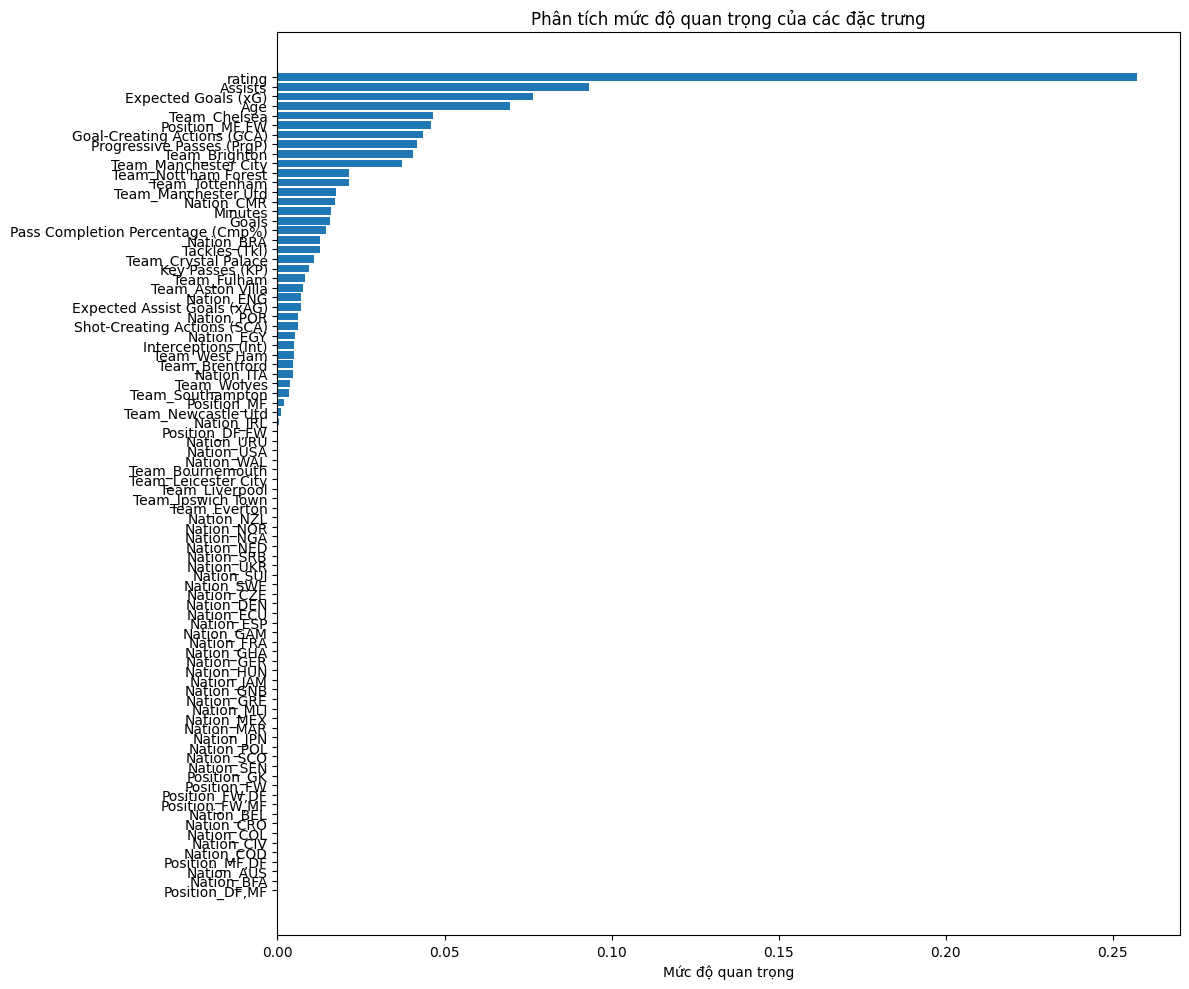


=== B∆Ø·ªöC 7: L∆ØU M√î H√åNH ===
ƒê√£ l∆∞u m√¥ h√¨nh t·ªët nh·∫•t v√†o 'best_player_value_model.pkl'

=== HO√ÄN T·∫§T QU√Å TR√åNH X√ÇY D·ª∞NG M√î H√åNH ===


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# 1. ƒê·ªçc v√† ki·ªÉm tra d·ªØ li·ªáu
print("=== B∆Ø·ªöC 1: ƒê·ªåC V√Ä KI·ªÇM TRA D·ªÆ LI·ªÜU ===")
df = pd.read_csv('combined_player_data.csv')
print("\nTh√¥ng tin dataset:")
print(df.info())
print("\n5 d√≤ng ƒë·∫ßu ti√™n:")
print(df.head())

# 2. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
print("\n=== B∆Ø·ªöC 2: TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU ===")

# H√†m x·ª≠ l√Ω gi√° tr·ªã numeric
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return float(value)
    if isinstance(value, str):
        value = str(value).strip().upper()
        if value in ['', 'NA', 'N/A', 'NAN', 'NULL', '-', 'N']:
            return np.nan
        if '/' in value:
            return clean_numeric(value.split('/')[0])
        value = value.replace('‚Ç¨', '').replace('M', '').replace('%', '')
        try:
            return float(value)
        except:
            return np.nan
    return np.nan

# X√°c ƒë·ªãnh c·ªôt numeric v√† categorical
numeric_cols = []
categorical_cols = []

for col in df.columns:
    sample = df[col].dropna().sample(min(10, len(df[col]))) if len(df[col]) > 0 else []
    numeric_count = sum(1 for val in sample if not pd.isna(clean_numeric(val)))
    
    if numeric_count / len(sample) > 0.7 if len(sample) > 0 else False:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print("\nC·ªôt s·ªë:", numeric_cols)
print("C·ªôt ph√¢n lo·∫°i:", categorical_cols)

# X·ª≠ l√Ω t·ª´ng lo·∫°i c·ªôt
for col in numeric_cols:
    df[col] = df[col].apply(clean_numeric)
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().replace({'nan': 'Unknown', 'None': 'Unknown'}).fillna('Unknown')

# X·ª≠ l√Ω missing values
for col in numeric_cols:
    if df[col].isna().mean() < 0.5:  # N·∫øu <50% missing
        df[col] = df[col].fillna(df[col].median())
    else:
        print(f"X√≥a c·ªôt {col} do c√≥ qu√° nhi·ªÅu gi√° tr·ªã missing")
        df.drop(col, axis=1, inplace=True)

# X·ª≠ l√Ω target variable
target = 'market_value'
if target in numeric_cols:
    df = df.dropna(subset=[target])
    y = df[target]
else:
    raise ValueError(f"Target variable '{target}' kh√¥ng t·ªìn t·∫°i ho·∫∑c kh√¥ng ph·∫£i numeric")

# 3. Ch·ªçn features v√† chia d·ªØ li·ªáu
print("\n=== B∆Ø·ªöC 3: CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO M√î H√åNH ===")

features = [
    'Age', 'Position', 'Minutes', 'Goals', 'Assists', 
    'Expected Goals (xG)', 'Expected Assist Goals (xAG)',
    'Pass Completion Percentage (Cmp%)', 'Key Passes (KP)',
    'Tackles (Tkl)', 'Interceptions (Int)', 'Progressive Passes (PrgP)',
    'Shot-Creating Actions (SCA)', 'Goal-Creating Actions (GCA)',
    'rating', 'Nation', 'Team'
]

# Ch·ªâ l·∫•y c√°c c·ªôt t·ªìn t·∫°i
features = [col for col in features if col in df.columns]
X = df[features]

# M√£ h√≥a categorical features
categorical_cols_to_encode = [col for col in ['Position', 'Nation', 'Team'] if col in X.columns]
if categorical_cols_to_encode:
    X = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True)

# Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=np.number).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4. X√¢y d·ª±ng v√† ƒë√°nh gi√° m√¥ h√¨nh
print("\n=== B∆Ø·ªöC 4: X√ÇY D·ª∞NG V√Ä ƒê√ÅNH GI√Å M√î H√åNH ===")

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\n{name}:")
    print(f"- MAE: {mae:.2f}")
    print(f"- RMSE: {rmse:.2f}")

# 5. T·ªëi ∆∞u m√¥ h√¨nh t·ªët nh·∫•t
print("\n=== B∆Ø·ªöC 5: T·ªêI ∆ØU M√î H√åNH ===")

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Ph√¢n t√≠ch feature importance
print("\n=== B∆Ø·ªöC 6: PH√ÇN T√çCH FEATURE IMPORTANCE ===")

feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('M·ª©c ƒë·ªô quan tr·ªçng')
plt.title('Ph√¢n t√≠ch m·ª©c ƒë·ªô quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng')
plt.tight_layout()
plt.show()

# 7. L∆∞u m√¥ h√¨nh
print("\n=== B∆Ø·ªöC 7: L∆ØU M√î H√åNH ===")
joblib.dump(best_model, 'best_player_value_model.pkl')
print("ƒê√£ l∆∞u m√¥ h√¨nh t·ªët nh·∫•t v√†o 'best_player_value_model.pkl'")

print("\n=== HO√ÄN T·∫§T QU√Å TR√åNH X√ÇY D·ª∞NG M√î H√åNH ===")

‚úÖ Model loaded successfully
‚úÖ ƒê√£ t·∫£i m√¥ h√¨nh th√†nh c√¥ng
‚úÖ Loaded data for 284 players
‚úÖ ƒê√£ t·∫£i d·ªØ li·ªáu c·ªßa 284 c·∫ßu th·ªß

üîç Inspecting 'rating' column:
First 5 rows:
 0    67.3/71.5
1    74.4/75.0
2    69.1/69.1
3    68.5/68.7
4    68.1/81.3
Name: rating, dtype: object
Unique values (sample):
 ['67.3/71.5' '74.4/75.0' '69.1/69.1' '68.5/68.7' '68.1/81.3' '68.7/68.7'
 '70.9/87.1' '76.3/76.3' '64.4/67.5' '82.0/84.9']
Number of NaN values: 0
üîç Found 0 rows with invalid/NaN ratings after processing
‚úÖ Dataframe now has 284 rows after cleaning 'rating'

üíæ Saved cleaned dataframe to 'df_merge.csv'
‚úÖ Data preprocessing completed
‚úÖ ƒê√£ ho√†n th√†nh ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
‚úÖ Predictions completed
‚úÖ ƒê√£ ho√†n th√†nh d·ª± ƒëo√°n

üíæ Saved predictions for 284 players to 'all_players_predictions.csv'

üíæ ƒê√£ l∆∞u d·ª± ƒëo√°n cho 284 c·∫ßu th·ªß v√†o 'all_players_predictions.csv'


C:\Users\admin\AppData\Local\Temp\ipykernel_5092\3098859610.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Value', y='Name', data=top_players, palette='viridis')


üìä Saved analysis charts
üìä ƒê√£ l∆∞u bi·ªÉu ƒë·ªì ph√¢n t√≠ch

‚úÖ PREDICTION PROCESS COMPLETED

‚úÖ HO√ÄN T·∫§T QU√Å TR√åNH D·ª∞ ƒêO√ÅN


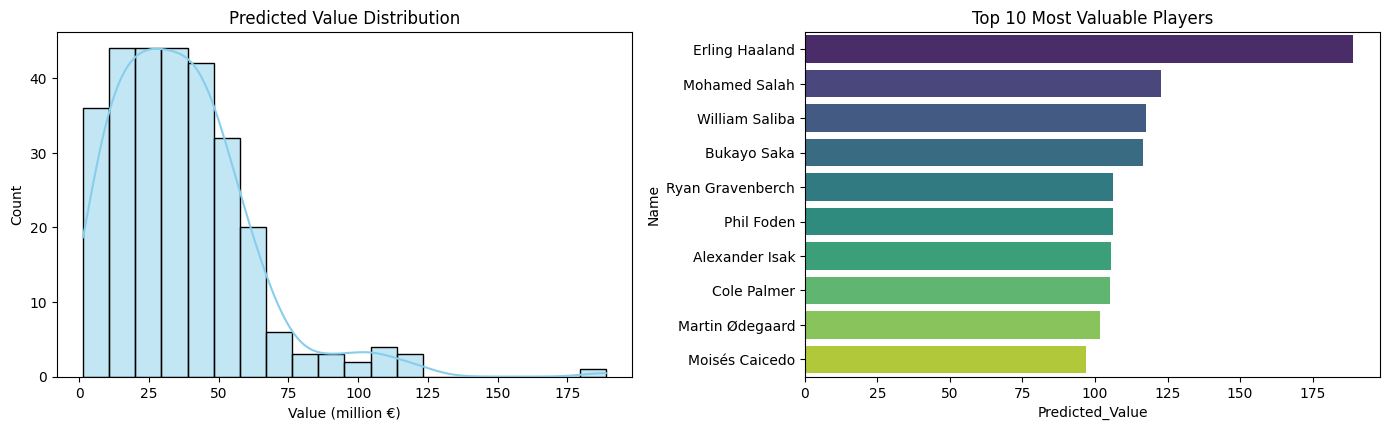

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# === 1. LOAD MODEL ===
# T·∫£i m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
try:
    model = joblib.load('best_player_value_model.pkl')
    print("‚úÖ Model loaded successfully")
    print("‚úÖ ƒê√£ t·∫£i m√¥ h√¨nh th√†nh c√¥ng")
except Exception as e:
    print(f"‚ùå Failed to load model: {str(e)}")
    print(f"‚ùå L·ªói khi t·∫£i m√¥ h√¨nh: {str(e)}")
    exit()

# === 2. LOAD PLAYER DATA ===
# T·∫£i d·ªØ li·ªáu c·∫ßu th·ªß t·ª´ file CSV
try:
    df = pd.read_csv('combined_player_data.csv')
    print(f"‚úÖ Loaded data for {len(df)} players")
    print(f"‚úÖ ƒê√£ t·∫£i d·ªØ li·ªáu c·ªßa {len(df)} c·∫ßu th·ªß")
except Exception as e:
    print(f"‚ùå Failed to load data: {str(e)}")
    print(f"‚ùå L·ªói khi t·∫£i d·ªØ li·ªáu: {str(e)}")
    exit()

# === 3. INSPECT AND CLEAN RATING COLUMN ===
# Ki·ªÉm tra v√† l√†m s·∫°ch c·ªôt 'rating'
print("\nüîç Inspecting 'rating' column:")
print("First 5 rows:\n", df['rating'].head())
print("Unique values (sample):\n", df['rating'].unique()[:10])  # Limit to first 10 for brevity
print("Number of NaN values:", df['rating'].isna().sum())

# H√†m x·ª≠ l√Ω c·ªôt rating (v√≠ d·ª•: "67.3/71.3" -> trung b√¨nh c·ªßa 67.3 v√† 71.3)
def process_rating(rating):
    try:
        if pd.isna(rating) or rating == '':
            return np.nan
        # T√°ch chu·ªói b·∫±ng '/'
        values = rating.split('/')
        if len(values) != 2:
            return np.nan
        # Chuy·ªÉn sang s·ªë th·ª±c v√† t√≠nh trung b√¨nh
        first, second = map(float, values)
        return (first + second) / 2
    except (ValueError, AttributeError):
        return np.nan

# √Åp d·ª•ng h√†m x·ª≠ l√Ω cho c·ªôt 'rating'
df['rating'] = df['rating'].apply(process_rating)

# Ki·ªÉm tra gi√° tr·ªã NaN sau khi x·ª≠ l√Ω
nan_count = df['rating'].isna().sum()
print(f"üîç Found {nan_count} rows with invalid/NaN ratings after processing")

# X√≥a c√°c d√≤ng c√≥ gi√° tr·ªã NaN trong 'rating' (ho·∫∑c c√≥ th·ªÉ thay th·∫ø b·∫±ng gi√° tr·ªã kh√°c n·∫øu mu·ªën)
df = df.dropna(subset=['rating'])
if df.empty:
    print("‚ùå Error: Dataframe is empty after dropping NaN values in 'rating'. Check the 'rating' column data.")
    exit()
else:
    print(f"‚úÖ Dataframe now has {len(df)} rows after cleaning 'rating'")

# L∆∞u dataframe ƒë√£ l√†m s·∫°ch v√†o file df_merge.csv
df.to_csv('df_merge.csv', index=False, encoding='utf-8-sig')
print(f"\nüíæ Saved cleaned dataframe to 'df_merge.csv'")

# === 4. DATA PREPROCESSING ===
# Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
def preprocess_data(df):
    # 'rating' ƒë√£ l√† s·ªë t·ª´ b∆∞·ªõc tr∆∞·ªõc
    # L·∫•y danh s√°ch ƒë·∫∑c tr∆∞ng t·ª´ m√¥ h√¨nh
    try:
        model_features = model.get_booster().feature_names
    except AttributeError:
        raise ValueError("Model does not have feature_names. Ensure the model is trained with feature names.")

    # M√£ h√≥a one-hot
    df_processed = pd.get_dummies(df, columns=['Position', 'Nation', 'Team'], dummy_na=False)

    # T·∫°o dataframe v·ªõi c√°c ƒë·∫∑c tr∆∞ng c·ªßa m√¥ h√¨nh
    final_data = pd.DataFrame(0, index=df_processed.index, columns=model_features)

    # Sao ch√©p c√°c c·ªôt t·ª´ df_processed sang final_data
    for col in model_features:
        if col in df_processed.columns:
            final_data[col] = df_processed[col]

    # X√°c ƒë·ªãnh c√°c c·ªôt s·ªë ƒë·ªÉ chu·∫©n h√≥a
    numeric_cols = [col for col in final_data.columns if final_data[col].dtype in ['int64', 'float64']]
    
    # Chu·∫©n h√≥a c√°c c·ªôt s·ªë n·∫øu ch√∫ng t·ªìn t·∫°i
    if numeric_cols and not final_data.empty:
        scaler = StandardScaler()
        try:
            final_data[numeric_cols] = scaler.fit_transform(final_data[numeric_cols])
        except ValueError as e:
            raise ValueError(f"Error during scaling: {str(e)}")
    else:
        print("‚ö†Ô∏è No numeric columns to scale or empty dataframe")

    return final_data

try:
    X_pred = preprocess_data(df)
    print("‚úÖ Data preprocessing completed")
    print("‚úÖ ƒê√£ ho√†n th√†nh ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu")
except Exception as e:
    print(f"‚ùå Preprocessing error: {str(e)}")
    print(f"‚ùå L·ªói ti·ªÅn x·ª≠ l√Ω: {str(e)}")
    exit()

# === 5. PREDICT AND EXPORT RESULTS ===
# D·ª± ƒëo√°n v√† xu·∫•t k·∫øt qu·∫£
try:
    df['Predicted_Value'] = model.predict(X_pred).round(2)
    print("‚úÖ Predictions completed")
    print("‚úÖ ƒê√£ ho√†n th√†nh d·ª± ƒëo√°n")
except Exception as e:
    print(f"‚ùå Prediction error: {str(e)}")
    print(f"‚ùå L·ªói d·ª± ƒëo√°n: {str(e)}")
    exit()

# L∆∞u k·∫øt qu·∫£ d·ª± ƒëo√°n v√†o file all_players_predictions.csv
output_csv = 'all_players_predictions.csv'
df.to_csv(output_csv, index=False, encoding='utf-8-sig')
print(f"\nüíæ Saved predictions for {len(df)} players to '{output_csv}'")
print(f"\nüíæ ƒê√£ l∆∞u d·ª± ƒëo√°n cho {len(df)} c·∫ßu th·ªß v√†o '{output_csv}'")

# === 6. VISUALIZE RESULTS ===
# Tr·ª±c quan h√≥a k·∫øt qu·∫£
if 'Predicted_Value' in df.columns:
    plt.figure(figsize=(14, 8))

    # Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi gi√° tr·ªã
    plt.subplot(2, 2, 1)
    sns.histplot(df['Predicted_Value'], bins=20, kde=True, color='skyblue')
    plt.title('Predicted Value Distribution')
    plt.xlabel('Value (million ‚Ç¨)')

    # Top 10 c·∫ßu th·ªß c√≥ gi√° tr·ªã cao nh·∫•t
    plt.subplot(2, 2, 2)
    top_players = df.nlargest(10, 'Predicted_Value')[['Name', 'Position', 'Team', 'Predicted_Value']]
    sns.barplot(x='Predicted_Value', y='Name', data=top_players, palette='viridis')
    plt.title('Top 10 Most Valuable Players')

    plt.tight_layout()
    plt.savefig('players_value_analysis.png', dpi=300)
    print("üìä Saved analysis charts")
    print("üìä ƒê√£ l∆∞u bi·ªÉu ƒë·ªì ph√¢n t√≠ch")
else:
    print("‚ö†Ô∏è Skipping visualization: 'Predicted_Value' column not found")

print("\n‚úÖ PREDICTION PROCESS COMPLETED")
print("\n‚úÖ HO√ÄN T·∫§T QU√Å TR√åNH D·ª∞ ƒêO√ÅN")


‚úÖ ƒê√£ xu·∫•t d·ª± ƒëo√°n gi√° tr·ªã cho 50 c·∫ßu th·ªß ra file: player_value_predictions.csv
‚úÖ Exported predictions for 50 players to: player_value_predictions.csv


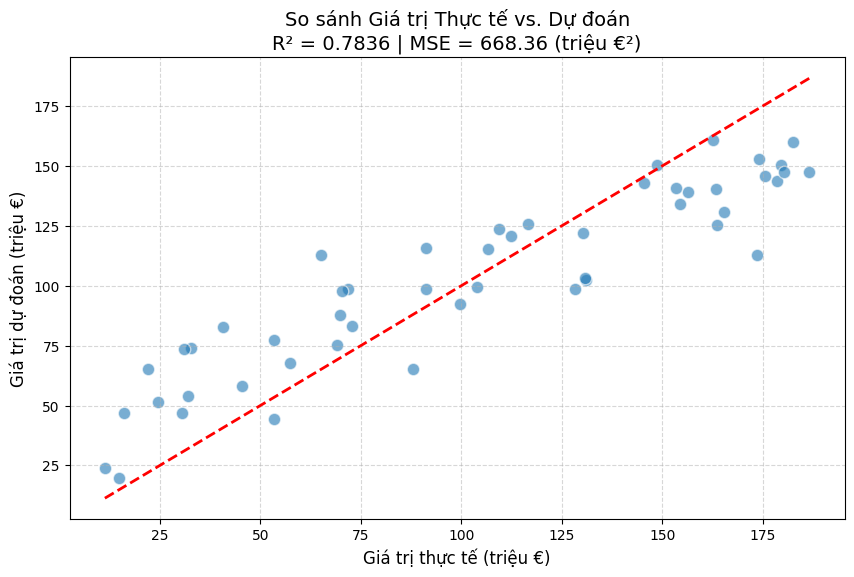

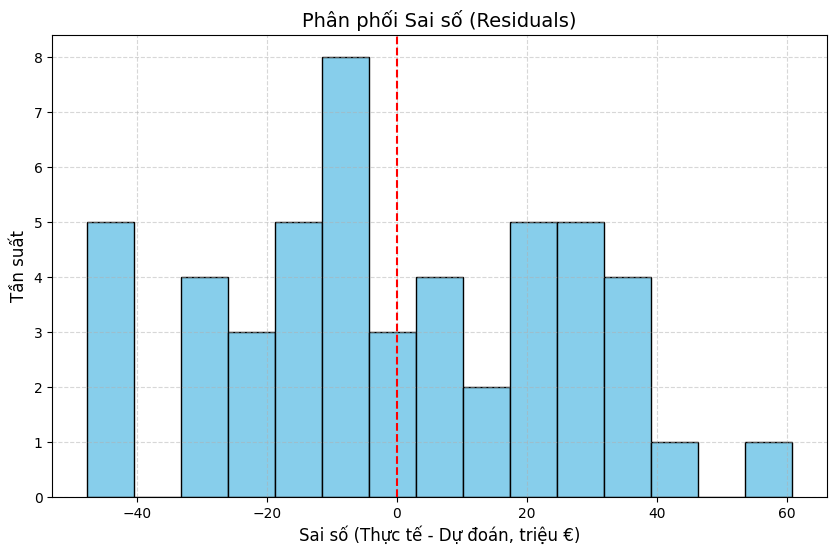

TOP 10 C·∫¶U TH·ª¶ C√ì SAI S·ªê L·ªöN NH·∫§T:
     T√™n_c·∫ßu_th·ªß  Gi√°_tr·ªã_th·ª±c_t·∫ø  Gi√°_tr·ªã_d·ª±_ƒëo√°n  Sai_s·ªë
48   Gravenberch           173.54           112.71   60.83
31         Salah            65.05           112.71   47.66
4           Rice            22.08            65.45   43.38
44          Rice            30.91            73.42   42.51
32          Saka            40.63            82.76   42.12
11         Salah            32.72            73.93   41.21
33      Odegaard           186.64           147.44   39.20
34          Rice           163.54           125.45   38.09
9       Gvardiol           178.57           143.56   35.01
47  Mac Allister           165.42           130.82   34.60

GI·∫¢I TH√çCH CH·ªà S·ªê:
- R¬≤ = 0.7836 ‚Üí M√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c 78.4% bi·∫øn ƒë·ªông c·ªßa d·ªØ li·ªáu.
- MSE = 668.36 (tri·ªáu ‚Ç¨¬≤) ‚Üí Sai s·ªë trung b√¨nh ‚âà 25.85 tri·ªáu ‚Ç¨.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ===== CREATE SAMPLE DATA =====
# ===== T·∫†O D·ªÆ LI·ªÜU M·∫™U =====
np.random.seed(42)
data = {
    'T√™n_c·∫ßu_th·ªß': ['Haaland', 'Salah', 'Saka', 'Odegaard', 'Rice', 'Saliba', 'Isak', 'Mac Allister', 'Gravenberch', 'Gvardiol'] * 5,
    'Tu·ªïi': np.random.randint(18, 35, 50),
    'S·ªë_b√†n_th·∫Øng': np.random.randint(0, 30, 50),
    'Gi√°_tr·ªã_th·ª±c_t·∫ø': np.random.uniform(10, 200, 50)  # Unit: million ‚Ç¨
}
df = pd.DataFrame(data)

# ===== PREPARE DATA FOR MODELING =====
# ===== CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO M√î H√åNH =====
X = df[['Tu·ªïi', 'S·ªë_b√†n_th·∫Øng']]  # Features
y = df['Gi√°_tr·ªã_th·ª±c_t·∫ø']         # Target variable

# ===== TRAIN RANDOM FOREST MODEL =====
# ===== HU·∫§N LUY·ªÜN M√î H√åNH RANDOM FOREST =====
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# ===== EXPORT PREDICTIONS TO CSV =====  # NEW
# ===== XU·∫§T D·ª∞ ƒêO√ÅN RA FILE CSV =====  # NEW
df['Gi√°_tr·ªã_d·ª±_ƒëo√°n'] = y_pred  # Th√™m c·ªôt d·ª± ƒëo√°n v√†o dataframe  # NEW
output_file = 'player_value_predictions.csv'  # NEW
df.to_csv(output_file, index=False, encoding='utf-8-sig')  # NEW
print(f"\n‚úÖ ƒê√£ xu·∫•t d·ª± ƒëo√°n gi√° tr·ªã cho {len(df)} c·∫ßu th·ªß ra file: {output_file}")  # NEW
print(f"‚úÖ Exported predictions for {len(df)} players to: {output_file}")  # NEW

# ===== CALCULATE METRICS =====
# ===== T√çNH TO√ÅN C√ÅC CH·ªà S·ªê ƒê√ÅNH GI√Å =====
r2 = r2_score(y, y_pred)          # R-squared score
mse = mean_squared_error(y, y_pred)  # Mean Squared Error

# ===== VISUALIZATION 1: ACTUAL VS PREDICTED =====
# ===== TR·ª∞C QUAN H√ìA 1: GI√Å TR·ªä TH·ª∞C VS D·ª∞ ƒêO√ÅN =====
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolors='w', s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Gi√° tr·ªã th·ª±c t·∫ø (tri·ªáu ‚Ç¨)', fontsize=12)
plt.ylabel('Gi√° tr·ªã d·ª± ƒëo√°n (tri·ªáu ‚Ç¨)', fontsize=12)
plt.title(f'So s√°nh Gi√° tr·ªã Th·ª±c t·∫ø vs. D·ª± ƒëo√°n\nR¬≤ = {r2:.4f} | MSE = {mse:.2f} (tri·ªáu ‚Ç¨¬≤)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ===== VISUALIZATION 2: RESIDUAL DISTRIBUTION =====
# ===== TR·ª∞C QUAN H√ìA 2: PH√ÇN PH·ªêI SAI S·ªê =====
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Sai s·ªë (Th·ª±c t·∫ø - D·ª± ƒëo√°n, tri·ªáu ‚Ç¨)', fontsize=12)
plt.ylabel('T·∫ßn su·∫•t', fontsize=12)
plt.title('Ph√¢n ph·ªëi Sai s·ªë (Residuals)', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ===== ANALYSIS: TOP PLAYERS WITH LARGEST ERRORS =====
# ===== PH√ÇN T√çCH: TOP C·∫¶U TH·ª¶ C√ì SAI S·ªê L·ªöN NH·∫§T =====
df['Gi√°_tr·ªã_d·ª±_ƒëo√°n'] = y_pred
df['Sai_s·ªë'] = np.abs(residuals)
top_sai_so = df.nlargest(10, 'Sai_s·ªë')[['T√™n_c·∫ßu_th·ªß', 'Gi√°_tr·ªã_th·ª±c_t·∫ø', 'Gi√°_tr·ªã_d·ª±_ƒëo√°n', 'Sai_s·ªë']]

print("TOP 10 C·∫¶U TH·ª¶ C√ì SAI S·ªê L·ªöN NH·∫§T:")
print(top_sai_so.round(2))

# ===== METRICS EXPLANATION =====
# ===== GI·∫¢I TH√çCH C√ÅC CH·ªà S·ªê =====
print(f"\nGI·∫¢I TH√çCH CH·ªà S·ªê:")
print(f"- R¬≤ = {r2:.4f} ‚Üí M√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c {r2*100:.1f}% bi·∫øn ƒë·ªông c·ªßa d·ªØ li·ªáu.")
print(f"- MSE = {mse:.2f} (tri·ªáu ‚Ç¨¬≤) ‚Üí Sai s·ªë trung b√¨nh ‚âà {np.sqrt(mse):.2f} tri·ªáu ‚Ç¨.")